In [35]:
# gzip is a pacakge for opening/making gz files
import gzip
# import plt for plotting
import matplotlib.pyplot as plt
# import numpy for Array creation/manipulation
import numpy as np
# import os for working with local files
import os
# pandas is a package for creating / editing data frames
import pandas as pd
# seaborn is a statistical plotting package
import seaborn as sns

# generate plots in the jupyter notebook
%matplotlib inline

# set the size of the figures 
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(23.4,16.54)})
# set the backgrounds of figures to white with a grid
sns.set_style("whitegrid")

# Loading File and Build the Data frame

In [38]:
# Path to folder containing the raw data
DATA_DIR = '../../bioinf/topic2/data/'
# File name of the raw data
DATA_FILENAME = 'ALL_vs_AML_train_set_38_sorted.res'
# Load the data into a dataframe
df = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep='\t',
    
)
# drop first row 
df = df[1:]
# drop accession and last column
df = df.drop([df.columns[78],df.columns[0]],axis = 1)

#drop the unnamed columns
for column in df:
    if column[:7] == 'Unnamed':
        df = df.drop(column,axis = 1)

#change column name to accession  
df = df.set_index('Accession')

# drop the control
for i, row in df.iterrows():
    if 'control' in i :
        df.drop([i], inplace=True)
# Make sure that there are no NA values
print('NA values in DF:', df.isna().sum().sum())
# df.isna().sum().sum()

NA values in DF: 0


In [39]:
odf = df.copy()

# Normalization

In [7]:
# add two new columns containing the mean and std for each row respectively
df[['mean', 'std']] = df.agg(
    ['mean', 'std'], axis=1
)
bdf = df.copy(deep=True)
#normalization using z score
def z_score(x, u, s):
    return (x - u)/s

for index, row in df.iterrows():
    for column in df.columns[:-2]:
        df.at[index,column] = z_score(df.at[index,column],row['mean'],row['std'])


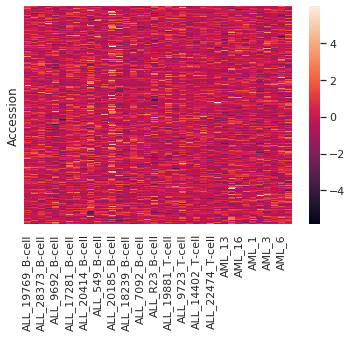

In [8]:
sns.heatmap(data=df.drop([df.columns[-1],df.columns[-2]],axis = 1), yticklabels=False)

# Calculate the t test value and rank it

In [9]:
# calculate welch's t test using the mean's and std's
#            m_1 - m_2
# t =    __________________
#          ________________
#         |std_1     std_2
#         |-----  +  ----
#       \/ num_1     num2
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']/len(ALL_samples) + row['AML_std']/len(AML_samples)
        )
    )


#seperate the samples 
samples = list()
for column in df:
    samples.append(column)
ALL_samples = samples[:27]
AML_samples = samples[27:38]
# add two new columns containing the mean and std for each row respectively
df[['ALL_mean', 'ALL_std']] = df[ALL_samples].agg(
    ['mean', 'std'], axis=1
)
# The same as above but for carcinoma samples
df[['AML_mean', 'AML_std']] = df[AML_samples].agg(
    ['mean', 'std'], axis=1
)

# create a column called similarity containing the results of the t test
df['similarity'] = df[['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std']].apply(welch_t_test, axis=1)
# sort the data using the similarity
# . once sorted we dont need any of the values used to calculate the similarity
# . This returns a dataframe containing only expression values
df_sorted = df.sort_values('similarity').drop(columns=['mean','std','ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])
df.head()

,ALL_19769_B-cell,ALL_23953_B-cell,ALL_28373_B-cell,ALL_9335_B-cell,ALL_9692_B-cell,ALL_14749_B-cell,ALL_17281_B-cell,ALL_19183_B-cell,ALL_20414_B-cell,ALL_21302_B-cell,...,AML_5,AML_6,AML_7,mean,std,ALL_mean,ALL_std,AML_mean,AML_std,similarity
Accession,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-0.850085,-0.128990,0.135716,0.446060,-2.666513,0.491699,0.263505,0.126588,0.035310,-3.241563,...,0.811171,-0.028584,-0.128990,-120.868421,109.555656,-0.138118,1.000267,0.339016,0.959521,-1.353463
AFFX-BioB-M_at,-0.031927,0.482378,0.337318,0.086759,-1.442971,0.759312,0.416442,1.036246,-0.902290,-0.823167,...,1.339554,0.943935,-0.467109,-150.578947,75.830405,-0.098352,1.024412,0.241410,0.938769,-0.967659
AFFX-BioB-3_at,-0.347043,2.397546,-0.499992,2.168122,0.205274,0.859557,-0.117619,-0.924851,-0.279065,-0.007156,...,0.562155,-0.168602,-0.449009,-17.157895,117.686144,-0.020373,1.105847,0.050007,0.718744,-0.215870
AFFX-BioC-5_at,-0.795056,-1.442216,-0.113836,-1.076060,-1.561430,-1.331518,-0.071259,-0.275626,0.644023,1.018694,...,0.414111,1.257121,1.325243,181.368421,117.436221,-0.288871,0.940590,0.709048,0.788306,-3.057871
AFFX-BioC-3_at,-0.165665,-1.282422,0.419732,-1.102300,-2.381167,0.879043,0.392714,0.644884,0.527805,-1.138324,...,-0.814104,0.797988,-1.174349,-276.605263,111.035796,-0.008225,0.977329,0.020188,1.102689,-0.076921


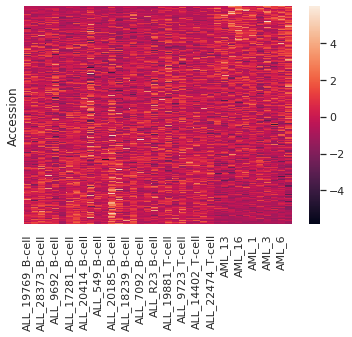

In [10]:
# The heatmap sorted by similarity does not show much when looking at all genes
sns.heatmap(data=df_sorted, yticklabels=False)

In [11]:
# Create a new dataframe containing the top 25 and bottom 25 genes by similarity
df_features = df_sorted.head(25).append(df_sorted.tail(25))


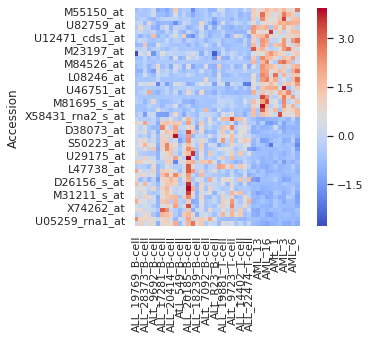

In [12]:
# when viewing this heatmap we see that the genes differentiate the data well
sns.heatmap(data=df_features, cmap='coolwarm', square=1)

# Save the result

In [13]:
# Path to the features folder
FEATURE_PATH = '../data/features/'
# if the folder does not exist, create it
if not os.path.exists(FEATURE_PATH):
    os.makedirs(FEATURE_PATH)

In [15]:
# Path to folder containing the raw data
DATA_DIR = '../data/'
# File name of the raw data
DATA_FILENAME = 'Leuk_ALL_AML.test.res'
# Load the data into a dataframe
dft = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep='\t',
    
)
# drop first row 
dft = dft[1:]
# drop accession and last column
dft = dft.drop([dft.columns[71],dft.columns[0]],axis = 1)
dft.head()

#drop the unnamed columns
for column in dft:
    if column[:7] == 'Unnamed':
        dft = dft.drop(column,axis = 1)

#change column name to accession  
dft = dft.set_index('Accession')

# drop the control
for i, row in dft.iterrows():
    if 'control' in i :
        dft.drop([i], inplace=True)

In [16]:
import sys
# Save the features dataframe to file
features = []
for i, row in df_features.iterrows():
    features.append(i)
odf.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'ALL_AML_features_50.csv'))
dft.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'Leuk_ALL_AML_test_features_50.csv'))

In [18]:
# Create a new dataframe containing the top 1 and bottom 1 genes by similarity
df_features = df_sorted.head(1).append(df_sorted.tail(1))

features = []
for i, row in df_features.iterrows():
    features.append(i)
odf.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'ALL_AML_features_2.csv'))
dft.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'Leuk_ALL_AML_test_features_2.csv'))

# Create a new dataframe containing the top 5 and bottom 5 genes by similarity
df_features = df_sorted.head(5).append(df_sorted.tail(5))

features = []
for i, row in df_features.iterrows():
    features.append(i)
odf.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'ALL_AML_features_10.csv'))
dft.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'Leuk_ALL_AML_test_features_10.csv'))


# Create a new dataframe containing the top 10 and bottom 10 genes by similarity
df_features = df_sorted.head(10).append(df_sorted.tail(10))

features = []
for i, row in df_features.iterrows():
    features.append(i)
odf.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'ALL_AML_features_20.csv'))
dft.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'Leuk_ALL_AML_test_features_20.csv'))

# Create a new dataframe containing the top 50 and bottom 50 genes by similarity
df_features = df_sorted.head(50).append(df_sorted.tail(50))

features = []
for i, row in df_features.iterrows():
    features.append(i)
odf.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'ALL_AML_features_100.csv'))
dft.loc[features].to_csv('{}{}'.format(FEATURE_PATH, 'Leuk_ALL_AML_test_features_100.csv'))